# Step 3: 1D Diffusion Equation

The one-dimensional unsteady diffusion equation is:

$$
\frac{\partial u}{\partial t} = \nu \frac{\partial^2 u}{\partial x^2}
$$

The first thing you should notice is that $\text{---}$ unlike the previous two simple equations we have studied $\text{---}$ this equation has a second-order derivative.
We first need to learn what to do with it!


### Discretizing $\frac{\partial^2{u}}{\partial x^2}$

The second-order derivative can be represented geometrically as the line tangent to the curve given by the first derivative.
We will discretize the second-order derivative with a _Central Difference_ scheme:
a combination of _Forward Difference_ and _Backward Difference_ of the first derivative. 
Consider the Taylor expansion of $u_{i+1}$ and $u_{i−1}$ around $u_i$:

$$
u_{i+1} = u_i + \mathop\Delta\!x \left.\frac{\partial u}{\partial x}\right|_i
+ \frac{\mathop\Delta\!x^2}{2!} \left.\frac{\partial^2 u}{\partial x^2}\right|_i
+ \frac{\mathop\Delta\!x^3}{3!} \left.\frac{\partial^3 u}{\partial x^3}\right|_i
+ \mathcal{O}\left(\mathop\Delta\!x^4\right)
$$

$$
u_{i-1} = u_i - \mathop\Delta\!x \left.\frac{\partial u}{\partial x}\right|_i
+ \frac{\mathop\Delta\!x^2}{2!} \left.\frac{\partial^2 u}{\partial x^2}\right|_i
- \frac{\mathop\Delta\!x^3}{3!} \left.\frac{\partial^3 u}{\partial x^3}\right|_i
+ \mathcal{O}\left(\mathop\Delta\!x^4\right)
$$

If we add these two expansions, you can see that the odd-numbered derivative terms will cancel each other out.
If we neglect any terms of $\mathcal{O}\left(\mathop\Delta\!x^4\right)$ or higher (and really, those are very small), then we can rearrange the sum of these two expansions to solve for our second-derivative.

$$
u_{i+1} + u_{i−1} = 2 u_i + \mathop\Delta\!x^2 \left.\frac{\partial^2 u}{\partial x^2}\right|_i + \mathcal{O}\left(\mathop\Delta\!x^4\right)
$$

Then rearrange to solve for $\left.\frac{\partial^2{u}}{\partial x^2}\right|_i$ and the result is:

$$
\frac{\partial^2 u}{\partial x^2} = \frac{u_{i+1} − 2 u_i + u_{i−1}}{\mathop\Delta\!x^2} + \mathcal{O}\left(\mathop\Delta\!x^2\right)
$$

### Back to Step 3

We can now write the discretized version of the diffusion equation in 1D:

$$
\frac{u^{n+1}_i - u^n_i}{\mathop\Delta\!t} = \nu \frac{u^n_{i+1} − 2 u^n_i + u^n_{i−1}}{\mathop\Delta\!x^2}
$$

As before, we notice that once we have an initial condition, the only unknown is $u^{n+1}_i$, so we re-arrange the equation solving for our unknown:

$$
u^{n+1}_i = u^n_i + \frac{\nu \mathop\Delta\!t}{\mathop\Delta\!x^2} \left(u^n_{i+1} − 2 u^n_i + u^n_{i−1}\right)
$$

The above discrete equation allows us to write a program to advance a solution in time.
But we need an initial condition.
Let's continue using our favorite:
the hat function.
So, at $t=0,\, u = 2$ in the interval $0.5 \le x \le 1$ and $u = 1$ everywhere else.
We are ready to number-crunch!

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib.animation as anim
plt.rcParams["figure.figsize"] = (4, 3)
plt.rcParams["animation.html"] = 'html5'

### Solution Parameters

In [2]:
domain_interval: int = (0.0, 2.0)
nx: int = 41
dx: float = 2 / (nx - 1)
nt: int = 20
nu: float = 0.3
sigma: float = 0.2
dt: float = sigma * dx**2 / nu

x = np.linspace(*domain_interval, nx)

### Initial Condition

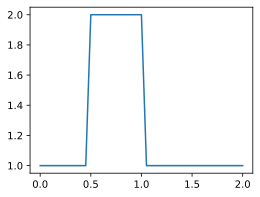

In [3]:
u = np.ones(nx)
u[int(0.5 / dx) : int(1 / dx + 1)] = 2
u0 = u.copy()

plt.plot(x, u0)
plt.show()

### Solution

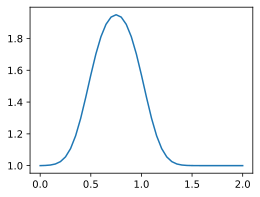

In [13]:
solutions = [u0]

u = u0.copy()

for n in range(nt):
    u[1:-1] = u[1:-1] + nu * dt / dx**2 * (u[2:] - 2 * u[1:-1] + u[:-2])
    solutions.append(u.copy())

plt.plot(x, u)
plt.show()

### Animation

In [15]:
fig = plt.figure()
(line,) = plt.plot(x, u0)
plt.close()


def update_anim(frame):
    line.set_ydata(solutions[frame])
    return (line,)


ani = anim.FuncAnimation(
    fig, func=update_anim, frames=len(solutions), interval=100, blit=True
)
ani